In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# load the data
df = pd.read_csv('starbucks_drinkMenu_expanded.csv')

In [57]:
# examine the dataset 
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

Some columns name has unwatned white space, some object features are supposed to be numerical features, let's correct them

In [59]:
# get rid of the unwanted white space
df.columns = df.columns.str.strip()
# remove % in the percentage columns
df['Vitamin A (% DV)'] = df['Vitamin A (% DV)'].str.replace('%','')
df['Vitamin C (% DV)'] = df['Vitamin C (% DV)'].str.replace('%','')
df['Calcium (% DV)'] = df['Calcium (% DV)'].str.replace('%','')
df['Iron (% DV)'] = df['Iron (% DV)'].str.replace('%','')

In [60]:
df['Total Fat (g)'].iloc[237] = '3.2'

C:\Users\Yiming Lai\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [61]:
# convert to float
df['Total Fat (g)'] = df['Total Fat (g)'].astype('float64')
df['Vitamin A (% DV)'] = df['Vitamin A (% DV)'].astype('float64')
df['Vitamin C (% DV)'] = df['Vitamin C (% DV)'].astype('float64')
df['Calcium (% DV)'] = df['Calcium (% DV)'].astype('float64')
df['Iron (% DV)'] = df['Iron (% DV)'].astype('float64')

In [62]:
# check if there is any missing values
df.isna().sum()

Beverage_category          0
Beverage                   0
Beverage_prep              0
Calories                   0
Total Fat (g)              0
Trans Fat (g)              0
Saturated Fat (g)          0
Sodium (mg)                0
Total Carbohydrates (g)    0
Cholesterol (mg)           0
Dietary Fibre (g)          0
Sugars (g)                 0
Protein (g)                0
Vitamin A (% DV)           0
Vitamin C (% DV)           0
Calcium (% DV)             0
Iron (% DV)                0
Caffeine (mg)              1
dtype: int64

Remove the missing value

In [65]:
df.dropna(inplace = True)

### EDA

Q1. Which kind of beverage does Starbucks sell the most?

In [74]:
# Check out the unique drink category and number of drinks in each category
df.Beverage_category.value_counts()

Classic Espresso Drinks              58
Tazo® Tea Drinks                     52
Signature Espresso Drinks            40
Frappuccino® Blended Coffee          36
Shaken Iced Beverages                17
Frappuccino® Blended Crème           13
Frappuccino® Light Blended Coffee    12
Smoothies                             9
Coffee                                4
Name: Beverage_category, dtype: int64

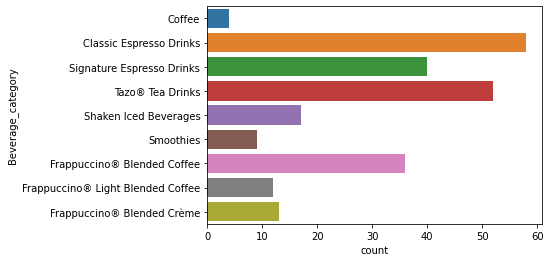

In [75]:
# visualize with count plot
_=sns.countplot(y=df.Beverage_category, data = df)

As expected the major product for Starbuck is their Classic Espresso Drinks. Interestingly, it appears that the Tzao Tea drinks is also very popular

Q2. What makes a drink high Calories?

<AxesSubplot:>

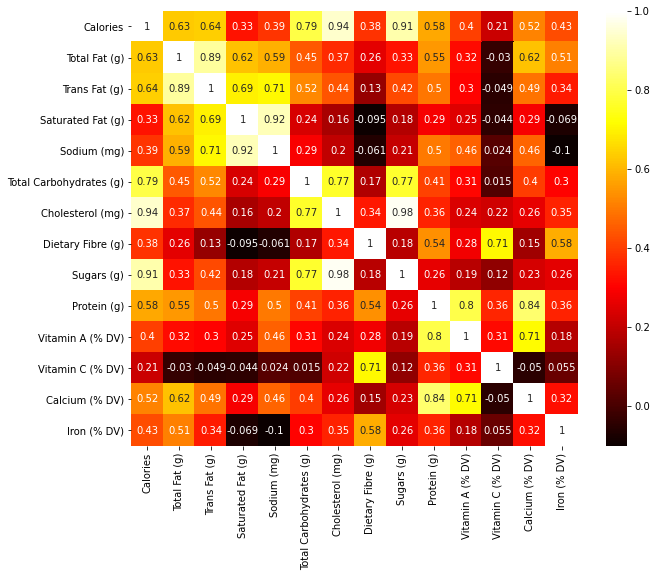

In [77]:
# Find the correlation between calories and other features
cor = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor, cmap = 'hot',annot = True)

Calories has very high correlation to Cholesterol, Sugars and Carbonhydrates. If we want to keep in shape we probably want to avoid those drinks with high Cholesterol, Sugars and Carbonhydrates

Visaulize the Calories vs the Beverage

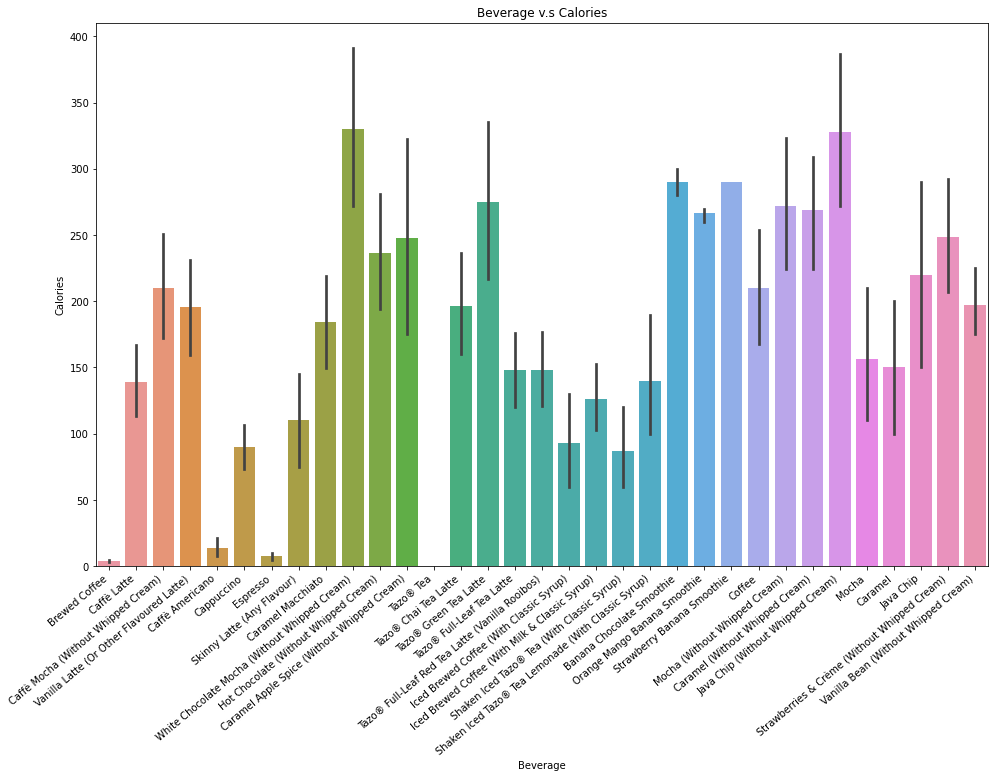

In [71]:
plt.figure(figsize=(16,10))
_= sns.barplot(x = df.Beverage, y = df.Calories, data = df)
_= plt.xticks(rotation=40, ha = 'right')
_= plt.title('Beverage v.s Calories')

In [84]:
calories = df.groupby('Beverage_category')['Calories'].mean().reset_index()

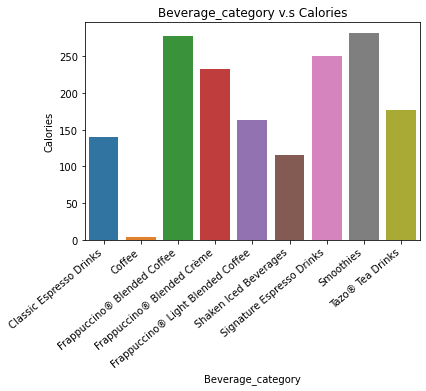

In [88]:
_= sns.barplot(x=calories.Beverage_category, y=calories.Calories, data = calories)
_= plt.xticks(rotation=40, ha = 'right')
_= plt.title('Beverage_category v.s Calories')

In general Smoothies and Frappuccino have highest calories